# 3.3 Reading texts at scale: Processing texts

In this notebook you learn to process and extract information from texts. We continue with the sonnet, but as promised, scale up soon. 

This notebook focusses on extracting basic information from texts, the number of sentences and words, and shows how to use external libraries for more refined enrichment, such as finding named entities or zoom in on specific word categories (nouns, verbs). We discuss how this could be relevant to historians.

## 3.3.1 Strings are sequences of characters

At this point you have basic understanding of how to read and manipulate textual data in Python. Now we can turn to more directly useful and realistic applications. 

In [1]:
path = "example_data/notebook_3/shakespeare_sonnet_i.txt"
sonnet = open(path,'r').read()
print(sonnet)

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.


We have encountered a few string methods that allow you to manipulate texts. `str.lowercase()` for example, converts capitals to lower case.


-- Exercise: lowercase the sonnet and store it in a variable called `sonnet_lower`

In [2]:
# remove this comment and add code here

While to a human reader (look at the document in very formally) the sonnet clearly consist of multiple lines and has contains many words (such a surprise). But at this stage the computer has no understanding of even these basic element of language, the concept of lines, sentences and words have to be made explicit before we can even start to think of how to encode the meaning of natural language with computational means (to be discussed later).

## 3.3.1 Tokens

Before we proceed, let's define, because what are words anyway?
Generally we make the distinction between `type` and `token`. We follow the definition [Smith, N.A., 2019](https://arxiv.org/pdf/1902.06006.pdf). 
- "A word **token** is a word observed in a piece of text." 
- "A word **type** is a distinct word, in the abstract, rather than a specific instance. Every word token is said to “belong” to its type."

 Example:
 > The sentence "two teas and two coffees" contains 5 tokens and 4 types (two appears twice).

As said in the introduction, text comes initially as unstructured data, as a sequence of character which we have manipulate to process properly. To make this clear, we can revisit the index notation to inspect the basic elements of a string.

In [3]:
sonnet[0]

'F'

As you notice `sonnet[0]` doesn't return the first word but the first character.

A seemingly straightforward way to transform the string to tokens is by splitting the text by white spaces and luckily Python provides us with a tool to do just that. The `str.split()` method will use the white spaces to split a string into a list of tokens. Run the code below, and inspect the output.

In [4]:
tokens = sonnet.split()
print(tokens)

['From', 'fairest', 'creatures', 'we', 'desire', 'increase,', 'That', 'thereby', "beauty's", 'rose', 'might', 'never', 'die,', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease,', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory:', 'But', 'thou,', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes,', "Feed'st", 'thy', "light's", 'flame', 'with', 'self-substantial', 'fuel,', 'Making', 'a', 'famine', 'where', 'abundance', 'lies,', 'Thyself', 'thy', 'foe,', 'to', 'thy', 'sweet', 'self', 'too', 'cruel:', 'Thou', 'that', 'art', 'now', 'the', "world's", 'fresh', 'ornament,', 'And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring,', 'Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content,', 'And', 'tender', 'churl', "mak'st", 'waste', 'in', 'niggarding:', 'Pity', 'the', 'world,', 'or', 'else', 'this', 'glutton', 'be,', 'To', 'eat', 'the', "world's", 'due,', 'by', 'the', 'grave', 'and', 'thee.']


In [5]:
print(type(tokens))

<class 'list'>


In [6]:
tokens[0]

'From'

This looks different to what we have encountered before:
- The output is enclosed by square brackets
- the quotation marks are now around the individual words not the whole string
- each word is separated from the next by a comma

What happened here is the following: split takes a string and returns a list of tokens. A `list` is another Python data type, such as strings, which we will be using a lot in the remainder of this course. The `intermezzo` provides more information, but we discuss them also here.

A Python list is an "is an ordered collection of values" ([Wentworth, et al. 2012](https://openbookproject.net/thinkcs/python/english3e/lists.html)). It is container that keeps several elements (also called) items in a particular order. Documents are often presented as a list, i.e. as a sequence of tokens in a specific order. 

Each element in the list implicitly indexed by place, i.e. you can retrieve an items by its position, for example the first and last word of the sonnet.

In [7]:
tokens[0]

'From'

In [8]:
tokens[-1]

'thee.'

With `len()` we can count the number of items the list contains (notice how this is different from the number of characters a string contains).

In [9]:
len(tokens)

105

Even though we called the variable in which we save the string we split `tokens`, upon closer inspection you may notice that some elements in this list aren't technically tokens as they also include some punctuation marks. If we look at items at position 5, 8 and 41 the difficulty of converting a string to a list of tokens becomes apparent. 

In [10]:
tokens[5],tokens[8],tokens[41]

('increase,', "beauty's", 'self-substantial')

While the `'increase,'` is clearly a token followed by a punctuation mark, dealing `"self-substantial"` is more complex, and depends on how you interpret and process such compounds (read it as one word, or split it into two, `"self"` and `"substantial"`?

Luckily, you don't have to worry too much about the subtleties unless you really want to! What makes Python so convenient are the many external libraries that provide you tools (in the form of function) that help you with more complex tasks.

Below we look at a very popular (but maybe outdated at this point) tool called the Natural Language Toolkit (NLTK). Later we discuss a few other options.

NLTK is a Python library for natural language processing, it was built to make certain like tokenization easier. The syntax below is unfamiliar and the intermezzo points to a more elaborate explanation. What this line of coude actually is does is importing tool (a function with the name `word_tokenize`) into our Notebook. This function is stored in the library (in `nltk.tokenize`).

In [11]:
from nltk.tokenize import word_tokenize

After importing `word_tokenize` we can apply it to our sonnet and print the result.

In [12]:
tokens_nltk = word_tokenize(sonnet)
print(tokens_nltk)

['From', 'fairest', 'creatures', 'we', 'desire', 'increase', ',', 'That', 'thereby', 'beauty', "'s", 'rose', 'might', 'never', 'die', ',', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', ',', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', ':', 'But', 'thou', ',', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', ',', "Feed'st", 'thy', 'light', "'s", 'flame', 'with', 'self-substantial', 'fuel', ',', 'Making', 'a', 'famine', 'where', 'abundance', 'lies', ',', 'Thyself', 'thy', 'foe', ',', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', ':', 'Thou', 'that', 'art', 'now', 'the', 'world', "'s", 'fresh', 'ornament', ',', 'And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', ',', 'Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', ',', 'And', 'tender', 'churl', "mak'st", 'waste', 'in', 'niggarding', ':', 'Pity', 'the', 'world', ',', 'or', 'else', 'this', 'glutton', 'be', ',', 'To', 'eat', 'the', 'world', "'s", 'due', ',', 'by', 'the', 'grave', 'and',

In [13]:
print(len(tokens_nltk))

127


-- Exercise: The previous returns a different number of tokens. Inspect the difference between splitting by white spaces and NLTK.

Together with lowercasing, tokenization is an essential step in the text processing pipeline. Now we can start investigating the sonnet in more detail, for example by counting words. The easiest way of doing this is using a `Counter()` object which again is a 

In [14]:
from collections import Counter
from nltk.tokenize import word_tokenize
path = "example_data/notebook_3/shakespeare_sonnet_i.txt"
sonnet = open(path,'r').read()
sonnet_lowercase = sonnet.lower()
tokens = word_tokenize(sonnet_lowercase)
word_counts = Counter(tokens)
word_counts

Counter({'from': 1,
         'fairest': 1,
         'creatures': 1,
         'we': 1,
         'desire': 1,
         'increase': 1,
         ',': 14,
         'that': 2,
         'thereby': 1,
         'beauty': 1,
         "'s": 4,
         'rose': 1,
         'might': 2,
         'never': 1,
         'die': 1,
         'but': 2,
         'as': 1,
         'the': 6,
         'riper': 1,
         'should': 1,
         'by': 2,
         'time': 1,
         'decease': 1,
         'his': 2,
         'tender': 2,
         'heir': 1,
         'bear': 1,
         'memory': 1,
         ':': 3,
         'thou': 2,
         'contracted': 1,
         'to': 4,
         'thine': 2,
         'own': 2,
         'bright': 1,
         'eyes': 1,
         "feed'st": 1,
         'thy': 4,
         'light': 1,
         'flame': 1,
         'with': 1,
         'self-substantial': 1,
         'fuel': 1,
         'making': 1,
         'a': 1,
         'famine': 1,
         'where': 1,
         'abundance': 

In [15]:
word_counts.most_common(10)

[(',', 14),
 ('the', 6),
 ("'s", 4),
 ('to', 4),
 ('thy', 4),
 (':', 3),
 ('world', 3),
 ('and', 3),
 ('that', 2),
 ('might', 2)]

In [16]:
word_counts['and']

3

## Intermezzo
- `''.join()`
- libraries and imports
- more NLTK functions

## 3.3.2 Research Example: Studying trends over time in the Medical Officer of Health Report

functions and iteration

In [19]:
from pathlib import Path
files = Path('data/MOH/').glob('*.txt')
file_paths = list(files)

In [20]:
file_paths[0]

PosixPath('data/MOH/BethnalGreenMetropolitanBorough.1930.b18236613.txt')

In [21]:
len(file_paths)

96

In [22]:
from collections import Counter
from collections import defaultdict
from nltk.tokenize import word_tokenize

def count_words(path):
    text = open(path,'r').read()
    text_lowercase = text.lower()
    tokens = word_tokenize(text_lowercase)
    word_counts = Counter(tokens)
    return word_counts


In [23]:
word_counts = count_words(file_paths[0])
word_counts.most_common(10)

[('the', 2112),
 ('.', 1718),
 (',', 1620),
 ('of', 1429),
 ('...', 1386),
 ('and', 874),
 ('in', 748),
 ('to', 733),
 ('1', 551),
 ('for', 417)]

In [24]:
str(file_paths[0]).split('.')

['data/MOH/BethnalGreenMetropolitanBorough', '1930', 'b18236613', 'txt']

In [25]:
str(file_paths[0]).split('.')[1]

'1930'

In [26]:
int(str(file_paths[0]).split('.')[1])

1930

In [27]:
def path2year(path):
    year = int(str(path).split('.')[1])
    return year

In [28]:
counts_over_time = {}

In [29]:
for p in file_paths[:10]:
    print(p)

data/MOH/BethnalGreenMetropolitanBorough.1930.b18236613.txt
data/MOH/BethnalGreen.1914.b18121925.txt
data/MOH/BethnalGreen.1926.b18220022.txt
data/MOH/BethnalGreenMetropolitanBorough.1950.b18236819.txt
data/MOH/BethnalGreen.1860.b18253982.txt
data/MOH/BethnalGreenMetropolitanBorough.1947.b18236789.txt
data/MOH/BethnalGreen.1870.b19952636.txt
data/MOH/BethnalGreen.1907.b18048377.txt
data/MOH/BethnalGreen.1885.b19952788.txt
data/MOH/BethnalGreen.1911.b1810874x.txt


In [30]:
for fp in file_paths[:10]:
    print(fp)

data/MOH/BethnalGreenMetropolitanBorough.1930.b18236613.txt
data/MOH/BethnalGreen.1914.b18121925.txt
data/MOH/BethnalGreen.1926.b18220022.txt
data/MOH/BethnalGreenMetropolitanBorough.1950.b18236819.txt
data/MOH/BethnalGreen.1860.b18253982.txt
data/MOH/BethnalGreenMetropolitanBorough.1947.b18236789.txt
data/MOH/BethnalGreen.1870.b19952636.txt
data/MOH/BethnalGreen.1907.b18048377.txt
data/MOH/BethnalGreen.1885.b19952788.txt
data/MOH/BethnalGreen.1911.b1810874x.txt


In [31]:
for fp in file_paths[:10]:
    print(p)

data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt
data/MOH/BethnalGreen.1911.b1810874x.txt


In [32]:
i = 0

In [33]:
i+=1
print(i)

1


In [34]:
target_term = 'pollution'
results = defaultdict(int)

for fp in file_paths:
    year = path2year(fp)
    word_counts = count_words(fp)
    count_for_target = word_counts[target_term]
    results[year]+= count_for_target
    

In [35]:
%matplotlib inline
import pandas as pd
results

defaultdict(int,
            {1930: 0,
             1914: 0,
             1926: 0,
             1950: 0,
             1860: 0,
             1947: 1,
             1870: 0,
             1907: 0,
             1885: 2,
             1911: 0,
             1893: 0,
             1887: 0,
             1912: 0,
             1932: 0,
             1878: 0,
             1879: 0,
             1959: 3,
             1903: 0,
             1931: 0,
             1867: 0,
             1933: 0,
             1892: 0,
             1929: 0,
             1910: 3,
             1957: 2,
             1896: 0,
             1895: 0,
             1888: 0,
             1894: 0,
             1954: 0,
             1857: 0,
             1871: 0,
             1872: 0,
             1868: 0,
             1923: 0,
             1953: 0,
             1940: 0,
             1889: 0,
             1928: 0,
             1948: 0,
             1897: 0,
             1898: 0,
             1963: 1,
             1916: 0,
             19

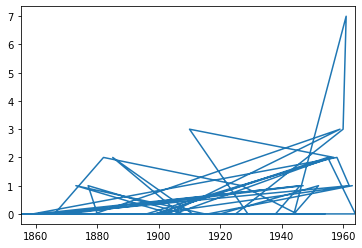

In [36]:
pd.Series(results).plot()

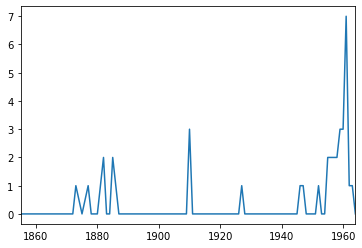

In [37]:
years_sorted = sorted(results)
pd.Series(results,index=years_sorted).plot()

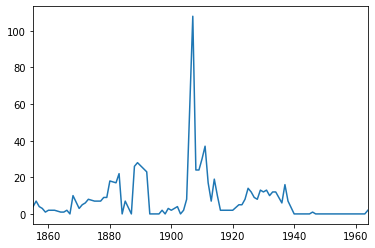

In [38]:
target_terms = ['poverty','poor']
results = defaultdict(int)

for fp in file_paths:
    year = path2year(fp)
    word_counts = count_words(fp)
    for target_term in target_terms:
        count_for_target = word_counts[target_term]
        results[year]+= count_for_target

years_sorted = sorted(results)
pd.Series(results,index=years_sorted).plot()

## 3.3.2 Text Processing with SpaCy
SpaCy

In [ ]:
import spacy

In [ ]:
# Load English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
paragraph = """Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures orconversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”"""

In [ ]:
doc = nlp(paragraph)

In [ ]:
for sent in doc.sents:
    print(sent.text)
    print()

In [ ]:
for token in doc:
    print(token.text)

In [ ]:
for sent in doc.sents:
    print(sent)
    for token in sent:
        print(token.text)
        

In [ ]:
for token in doc:
    print(token.lemma_)

In [ ]:
for token in doc:
    print(token.text, token.pos_)
  

In [ ]:
for token in doc:  
    if token.pos_ == "NOUN":
        print(token.text,token.pos_)


In [ ]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
## Counting

In [ ]:
## Trends over time